[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/tpot_auto_ml.ipynb)

## [T Pot](https://towardsdatascience.com/tpot-automated-machine-learning-in-python-4c063b3e5de9)

In [1]:
from IPython.display import clear_output

# Install pydot
print("Installing graphiz and pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

print("Installing tpot")
!pip install tpot
clear_output()

print("Downloading pima-indians-diabetes")
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
clear_output()

!ls

pima-indians-diabetes.data.csv	sample_data


In [2]:
import numpy as np
import pandas as pd

from tpot import TPOTClassifier

#scikit-learn package (https://pypi.org/project/scikit-learn)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split #TAKES NUMPY OR DATA FRAME!!
from sklearn.metrics.scorer import make_scorer

import matplotlib.pyplot as plt

import itertools

#Split train and test set.
RANDOM_STATE = 123

# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)

x_df = df.drop(df.columns[8],axis=1)
y_df = df[df.columns[8]]

df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.85, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


print("Train: ", X_train.shape[0])
print("Validation: ",X_validation.shape[0])
print("Test: ",X_test.shape[0])

('Train: ', 554)
('Validation: ', 98)
('Test: ', 116)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
tpot = None
del tpot

tpot = TPOTClassifier(
                      verbosity=3, 
                      scoring="balanced_accuracy", 
                      random_state=23, 
                      periodic_checkpoint_folder="tpot_mnst1.txt", 
                      n_jobs=-1, 
                      generations=10, 
                      population_size=100
)

tpot.fit(X, y)

30 operators have been imported by TPOT.


Optimization Progress:   9%|▉         | 101/1100 [00:46<09:57,  1.67pipeline/s]

Created new folder to save periodic pipeline: tpot_mnst1.txt
Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.18_17-07-24.py


Optimization Progress:   9%|▉         | 101/1100 [00:48<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:   9%|▉         | 101/1100 [00:49<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 cosine was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:   9%|▉         | 101/1100 [00:49<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 101/1100 [00:51<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 101/1100 [00:52<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:   9%|▉         | 101/1100 [00:54<09:56,  1.68pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  18%|█▊        | 201/1100 [02:01<09:03,  1.65pipeline/s]

Generation 1 - Current Pareto front scores:
-1	0.744062842528	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=17, DecisionTreeClassifier__min_samples_split=18)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.18_17-08-39.py


Optimization Progress:  18%|█▊        | 201/1100 [02:04<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  18%|█▊        | 201/1100 [02:04<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 97


Optimization Progress:  18%|█▊        | 201/1100 [02:05<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False


Optimization Progress:  18%|█▊        | 201/1100 [02:05<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  18%|█▊        | 201/1100 [02:07<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  18%|█▊        | 201/1100 [02:08<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  18%|█▊        | 201/1100 [02:09<18:17,  1.22s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False
_pre_test decorator: _random_mutation_operator: num_test=1 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  18%|█▊        | 203/1100 [02:10<42:39,  2.85s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  27%|██▋       | 301/1100 [03:08<06:36,  2.02pipeline/s]

Generation 2 - Current Pareto front scores:
-1	0.744062842528	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=17, DecisionTreeClassifier__min_samples_split=18)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  27%|██▋       | 301/1100 [03:10<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  27%|██▋       | 301/1100 [03:10<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  27%|██▋       | 301/1100 [03:11<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 cosine was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  27%|██▋       | 301/1100 [03:17<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  27%|██▋       | 301/1100 [03:19<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  27%|██▋       | 301/1100 [03:20<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values.


Optimization Progress:  27%|██▋       | 301/1100 [03:21<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  27%|██▋       | 301/1100 [03:22<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  27%|██▋       | 301/1100 [03:23<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  27%|██▋       | 301/1100 [03:24<06:36,  2.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True


Optimization Progress:  28%|██▊       | 303/1100 [03:26<1:15:03,  5.65s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  36%|███▋      | 401/1100 [05:12<14:29,  1.24s/pipeline]

Generation 3 - Current Pareto front scores:
-1	0.744062842528	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=17, DecisionTreeClassifier__min_samples_split=18)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  36%|███▋      | 401/1100 [05:12<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 77


Optimization Progress:  36%|███▋      | 401/1100 [05:13<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 401/1100 [05:19<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 401/1100 [05:21<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  36%|███▋      | 401/1100 [05:21<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True


Optimization Progress:  36%|███▋      | 401/1100 [05:31<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  36%|███▋      | 401/1100 [05:33<14:29,  1.24s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  37%|███▋      | 403/1100 [05:39<1:45:37,  9.09s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  46%|████▌     | 501/1100 [08:00<09:52,  1.01pipeline/s]

Generation 4 - Current Pareto front scores:
-1	0.744062842528	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=17, DecisionTreeClassifier__min_samples_split=18)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  46%|████▌     | 501/1100 [08:03<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  46%|████▌     | 501/1100 [08:04<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  46%|████▌     | 501/1100 [08:07<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  46%|████▌     | 501/1100 [08:08<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  46%|████▌     | 501/1100 [08:12<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  46%|████▌     | 501/1100 [08:13<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  46%|████▌     | 501/1100 [08:19<09:52,  1.01pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True


Optimization Progress:  55%|█████▍    | 601/1100 [10:14<10:18,  1.24s/pipeline]

Generation 5 - Current Pareto front scores:
-1	0.744062842528	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=17, DecisionTreeClassifier__min_samples_split=18)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  55%|█████▍    | 601/1100 [10:15<08:31,  1.02s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  55%|█████▍    | 601/1100 [10:20<08:31,  1.02s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True
_pre_test decorator: _random_mutation_operator: num_test=1 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  55%|█████▍    | 601/1100 [10:24<08:31,  1.02s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values.


Optimization Progress:  55%|█████▍    | 601/1100 [10:28<08:31,  1.02s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  55%|█████▍    | 601/1100 [10:29<08:31,  1.02s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  55%|█████▍    | 603/1100 [10:34<29:04,  3.51s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  64%|██████▎   | 701/1100 [12:39<06:56,  1.04s/pipeline]

Generation 6 - Current Pareto front scores:
-1	0.745495270572	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=4, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  64%|██████▎   | 701/1100 [12:44<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  64%|██████▎   | 701/1100 [12:44<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 701/1100 [12:46<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 701/1100 [12:47<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True


Optimization Progress:  64%|██████▎   | 701/1100 [12:47<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 701/1100 [12:49<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=1 Input X must be non-negative


Optimization Progress:  64%|██████▎   | 701/1100 [12:51<06:56,  1.04s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Expected n_neighbors <= n_samples,  but n_samples = 50, n_neighbors = 93


Optimization Progress:  73%|███████▎  | 801/1100 [15:57<16:35,  3.33s/pipeline]

Generation 7 - Current Pareto front scores:
-1	0.745495270572	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=4, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
-2	0.762472293265	GaussianNB(GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=9, GradientBoostingClassifier__max_features=0.8, GradientBoostingClassifier__min_samples_leaf=12, GradientBoostingClassifier__min_samples_split=12, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.6500000000000001))

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  73%|███████▎  | 801/1100 [15:58<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  73%|███████▎  | 801/1100 [16:01<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 array must not contain infs or NaNs
_pre_test decorator: _random_mutation_operator: num_test=1 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 801/1100 [16:02<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 801/1100 [16:09<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False


Optimization Progress:  73%|███████▎  | 801/1100 [16:09<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  73%|███████▎  | 801/1100 [16:13<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True


Optimization Progress:  73%|███████▎  | 801/1100 [16:17<16:35,  3.33s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  82%|████████▏ | 901/1100 [18:45<03:59,  1.21s/pipeline]

Generation 8 - Current Pareto front scores:
-1	0.745495270572	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=4, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
-2	0.765852717899	RandomForestClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=20, DecisionTreeClassifier__min_samples_split=3), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.7500000000000001, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)

Saving best periodic pipeline to tpot_mnst1.txt/pipeline_2018.10.18_17-25-23.py


Optimization Progress:  82%|████████▏ | 901/1100 [18:46<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  82%|████████▏ | 901/1100 [18:50<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  82%|████████▏ | 901/1100 [18:55<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  82%|████████▏ | 901/1100 [18:58<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  82%|████████▏ | 901/1100 [18:58<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 l1 was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  82%|████████▏ | 901/1100 [18:59<03:33,  1.07s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  82%|████████▏ | 902/1100 [19:03<19:45,  5.99s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  91%|█████████ | 1001/1100 [21:21<02:47,  1.69s/pipeline]

Generation 9 - Current Pareto front scores:
-1	0.745495270572	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.6000000000000001, RandomForestClassifier__min_samples_leaf=4, RandomForestClassifier__min_samples_split=13, RandomForestClassifier__n_estimators=100)
-2	0.765852717899	RandomForestClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=20, DecisionTreeClassifier__min_samples_split=3), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.7500000000000001, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)

Periodic pipeline was not saved, probably saved before...


Optimization Progress:  91%|█████████ | 1001/1100 [21:26<04:15,  2.58s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  91%|█████████ | 1001/1100 [21:34<04:15,  2.58s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  91%|█████████ | 1001/1100 [21:37<04:15,  2.58s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.


Optimization Progress:  91%|█████████▏| 1005/1100 [21:41<05:15,  3.32s/pipeline]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Generation 10 - Current Pareto front scores:
-1	0.748680631673	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.9000000000000001, RandomForestClassifier__min_samples_leaf=5, RandomForestClassifier__min_samples_split=15, RandomForestClassifier__n_estimators=100)
-2	0.765852717899	RandomForestClassifier(DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=entropy, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=20, DecisionTreeClassifier__min_samples_split=3), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.7500000000000001, RandomForestClassifier__min_samples_leaf=7, RandomForestClassifier__min_samples_split=17, RandomForestClassifier__n_estimators=100)



TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
        disable_update_check=False, early_stop=None, generations=10,
        max_eval_time_mins=5, max_time_mins=None, memory=None,
        mutation_rate=0.9, n_jobs=-1, offspring_size=None,
        periodic_checkpoint_folder='tpot_mnst1.txt', population_size=100,
        random_state=23, scoring='balanced_accuracy', subsample=1.0,
        use_dask=False, verbosity=3, warm_start=False)

In [5]:
tpot.score(X_test, y_test)

0.7822368421052632

In [6]:
# Winning pipelines
print(tpot.fitted_pipeline_)

Pipeline(memory=None,
     steps=[('stackingestimator', StackingEstimator(estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])


In [7]:
tpot.export('tpot_mnist_pipeline.py')

True

In [0]:
# Get predictions
y_predict = tpot.predict(X_test)

# Probability of malignant tissue produced by the model
y_prob = [probs[1] for probs in tpot.predict_proba(X_test)]

In [9]:
#Accuracy on test set
print("Test accuracy: %s"%(accuracy_score(y_test, y_predict).round(2)))

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted NO', 'Predicted YES'],
    index=['Actual NO', 'Actual YES']
)

Test accuracy: 0.78


,Predicted NO,Predicted YES
Actual NO,60,16
Actual YES,9,31


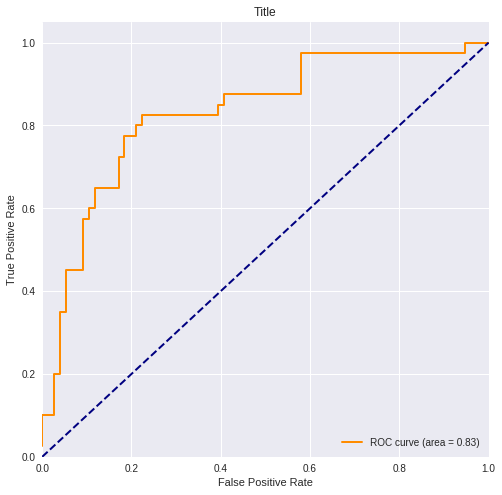

In [10]:
# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Title")
plt.legend(loc="lower right")
plt.show()